<a href="https://colab.research.google.com/github/K-Pridge/Prediction-of-Product-Sales/blob/main/Project_Part_8_Kyle_Pridgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 8 - Predicting Product Sales through Models

In [151]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import set_config
set_config(transform_output='pandas')

import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'


## Warnings
import warnings

In [152]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

In [154]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

## SK Learn Display Configuration

In [155]:
## SK Learn Display
set_config(display='diagram')

## Transformers output as a Pandas Dataframe
set_config(transform_output='pandas')

In [156]:
## Load Data
fpath = '/content/drive/MyDrive/Week 2 Data Colab /sales_predictions_2023.csv'
df = pd.read_csv(fpath)

## Inspect the Data

In [157]:
## Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
## Display the number of rows and columns for the dataframe
df.shape

(8523, 12)

In [159]:
## Display the number of rows and columns for the dataframe
## using a print() statement and an F-string
## 'There are x rows and x columns in the dataframe'
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.')

There are 8523 rows and 12 columns in the dataframe.


In [160]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [161]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [162]:
# Define the count of missing values by column
null_count = df.isna().sum()
# Define the percentage of missing values by column
null_percent = round(df.isna().sum()/len(df) * 100, 2)
# Define a dataframe of missing values
null_df = pd.DataFrame({'Count Missing': null_count,
                      'Percent Missing':null_percent})
# Define a filter for missing values
null_filter = null_df['Count Missing'] > 0

In [163]:
# Display the columns with missing values
# by count and percentage
null_df.loc[null_filter]

,Count Missing,Percent Missing
Item_Weight,1463,17.17
Outlet_Size,2410,28.28


In [164]:
# Describe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


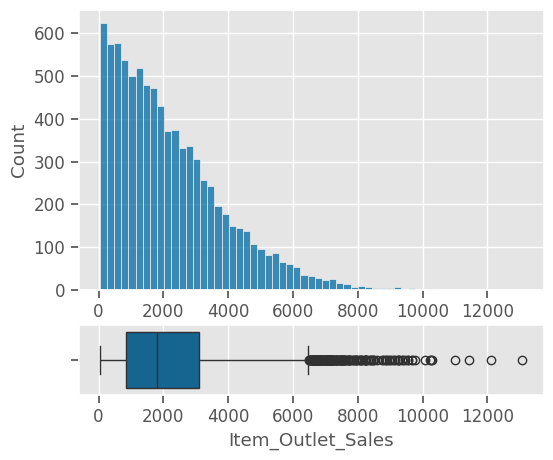

In [165]:
target = 'Item_Outlet_Sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target,ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

In [166]:
# ### Train Test Split
## Make x and y variables
target = "Item_Outlet_Sales"
drop_feats = []

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

In [167]:
# Display the first (5) rows of the dataframe
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,FDI60,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,Tier 3,Grocery Store
7604,DRD25,6.135,LF,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,NCP18,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,NCS30,5.945,LF,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,FDI08,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


### Drop Item_Identifier Column
- This column is not needed for prediction of product sales

In [168]:
## Drop Item_Identifier column from X_train and X_test
X_train = X_train.drop(columns='Item_Identifier')
X_test = X_test.drop(columns='Item_Identifier')

### Numeric PreProcessing Pipeline

#### *Do not use Scaler for LinReg Model*

In [169]:
## Define numerical features list
num_sel = make_column_selector(dtype_include='number')

## Instantiate the transformers
mean_imputer = SimpleImputer(strategy='mean')

## Define numerical tuple
num_tuple = ('Numeric', mean_imputer, num_sel)

### Categorical PreProcessing Pipeline

In [170]:
## Make categorical preprocessing pipeline
## Drop one of the binary columns after OHE to reduce multicollinearity

## Define categorical nominal features list
cat_sel = make_column_selector(dtype_include='object')

## Instantiate the transformers
constant_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary')

## Define the categorical pipeline
cat_pipe = make_pipeline(constant_imputer, ohe)

## Define categorical tuple
cat_tuple = ('Categorical', cat_pipe, cat_sel)

In [172]:
## make the preprocessing column transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('Numeric', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c400b4762f0>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c400b477670>)],
                  verbose_feature_names_out=False)

### Column Transformer

In [173]:
ColumnTransformer,
## Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([num_tuple,
                                  cat_tuple],
                                  remainder='drop',
                                  verbose_feature_names_out=False)

In [174]:
# Fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('Numeric', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c400b4762f0>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c400b477670>)],
                  verbose_feature_names_out=False)

In [175]:
# Transform the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

### Confirm PreProcessing

In [176]:
# Display the first (5) rows of the dataframe
display(X_train_proc.head())

# Check the shape
print(f'\nshape of processed data is: {X_train_proc.shape}')

# Check for remaining missing values
print(f'\nThere are {X_train_proc.isna().sum().sum()} missing values')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,18.200,0.066285,247.2092,2004.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0



shape of processed data is: (6392, 46)

There are 0 missing values


## Modeling the Data

### Functions

In [177]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True):
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

    else:
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")



### Linear Regression Model

In [178]:
## Create an instance of the model
lin_reg = LinearRegression()

## Fit the model
lin_reg.fit(X_train_proc, y_train)

LinearRegression()

In [179]:
## Display the Model's metrics
evaluate_regression(lin_reg, X_train_proc, y_train,
                    X_test_proc, y_test)

Split,R^2,MAE,RMSE
Train,0.56,826.82,"1,114.87"
Test,0.56,860.19,"1,164.39"


### Extracting and Visualizing Coefficients

In [180]:
## Display the model's coefficients
lin_reg.coef_

array([   1.09457524, -279.83996825,   15.59746506,  -14.14700332,
        -27.89757004,    4.99154419,   40.12538792,   59.05203102,
        -76.27139309,    9.47069413,   -6.1886736 ,   68.44834946,
         22.16631424,  -49.39516331,   -4.43958322,   16.57382693,
         48.71518597,  -41.37776441,  -68.6731589 ,  -15.68123635,
         18.93801214,   95.05144534,  -11.48237111, -117.19523855,
         35.06936123, -420.20658316,  -67.8115823 ,  213.05518556,
        -87.13296712, -464.48755833,  585.31859315,   66.82409733,
        -40.12906804,  301.65159117,  -87.08170825,  -67.8115823 ,
        411.10391777, -247.28046564,  -96.01186983, -249.91767541,
        239.75021485,   10.16746057, -884.69414148,  386.50851546,
        -87.13296712,  585.31859315])

In [181]:
## Display the model's intercept
lin_reg.intercept_

27965.579246101126

In [182]:
## Saving the coefficients
coef_series = pd.Series(lin_reg.coef_, index=lin_reg.feature_names_in_)
coef_series

Item_Weight                          1.094575
Item_Visibility                   -279.839968
Item_MRP                            15.597465
Outlet_Establishment_Year          -14.147003
Item_Fat_Content_LF                -27.897570
Item_Fat_Content_Low Fat             4.991544
Item_Fat_Content_Regular            40.125388
Item_Fat_Content_low fat            59.052031
Item_Fat_Content_reg               -76.271393
Item_Type_Baking Goods               9.470694
Item_Type_Breads                    -6.188674
Item_Type_Breakfast                 68.448349
Item_Type_Canned                    22.166314
Item_Type_Dairy                    -49.395163
Item_Type_Frozen Foods              -4.439583
Item_Type_Fruits and Vegetables     16.573827
Item_Type_Hard Drinks               48.715186
Item_Type_Health and Hygiene       -41.377764
Item_Type_Household                -68.673159
Item_Type_Meat                     -15.681236
Item_Type_Others                    18.938012
Item_Type_Seafood                 

In [183]:
## Add the Intercept
coef_series['intercept'] = lin_reg.intercept_
coef_series

Item_Weight                            1.094575
Item_Visibility                     -279.839968
Item_MRP                              15.597465
Outlet_Establishment_Year            -14.147003
Item_Fat_Content_LF                  -27.897570
Item_Fat_Content_Low Fat               4.991544
Item_Fat_Content_Regular              40.125388
Item_Fat_Content_low fat              59.052031
Item_Fat_Content_reg                 -76.271393
Item_Type_Baking Goods                 9.470694
Item_Type_Breads                      -6.188674
Item_Type_Breakfast                   68.448349
Item_Type_Canned                      22.166314
Item_Type_Dairy                      -49.395163
Item_Type_Frozen Foods                -4.439583
Item_Type_Fruits and Vegetables       16.573827
Item_Type_Hard Drinks                 48.715186
Item_Type_Health and Hygiene         -41.377764
Item_Type_Household                  -68.673159
Item_Type_Meat                       -15.681236
Item_Type_Others                      18

In [184]:
## formatting numbers to not use a , and to use thousands sep, and 4 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.4f}")

In [185]:
## show coefs again
coef_series

Item_Weight                            1.0946
Item_Visibility                     -279.8400
Item_MRP                              15.5975
Outlet_Establishment_Year            -14.1470
Item_Fat_Content_LF                  -27.8976
Item_Fat_Content_Low Fat               4.9915
Item_Fat_Content_Regular              40.1254
Item_Fat_Content_low fat              59.0520
Item_Fat_Content_reg                 -76.2714
Item_Type_Baking Goods                 9.4707
Item_Type_Breads                      -6.1887
Item_Type_Breakfast                   68.4483
Item_Type_Canned                      22.1663
Item_Type_Dairy                      -49.3952
Item_Type_Frozen Foods                -4.4396
Item_Type_Fruits and Vegetables       16.5738
Item_Type_Hard Drinks                 48.7152
Item_Type_Health and Hygiene         -41.3778
Item_Type_Household                  -68.6732
Item_Type_Meat                       -15.6812
Item_Type_Others                      18.9380
Item_Type_Seafood                 

In [186]:
# Define a function to extract linear regression coefficients
def get_coefficients(lin_reg):
    coefs = pd.Series(lin_reg.coef_, index=lin_reg.feature_names_in_)
    coefs['intercept'] = lin_reg.intercept_
    return coefs

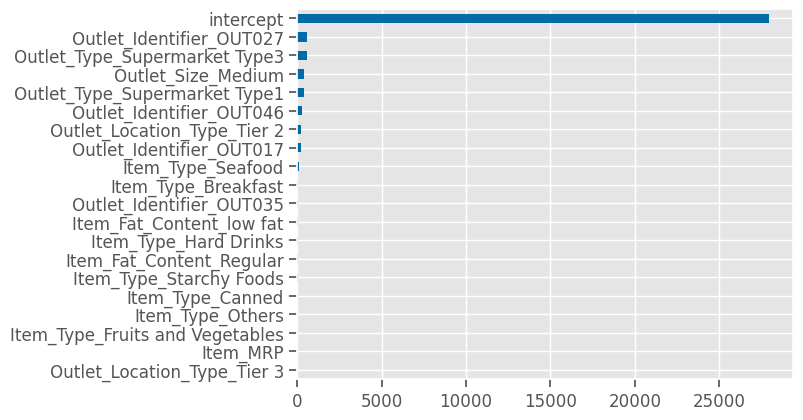

In [197]:
## Create a barplot of the coefficients
## sorted by values
coef_series.sort_values().tail(20).plot(kind='barh');

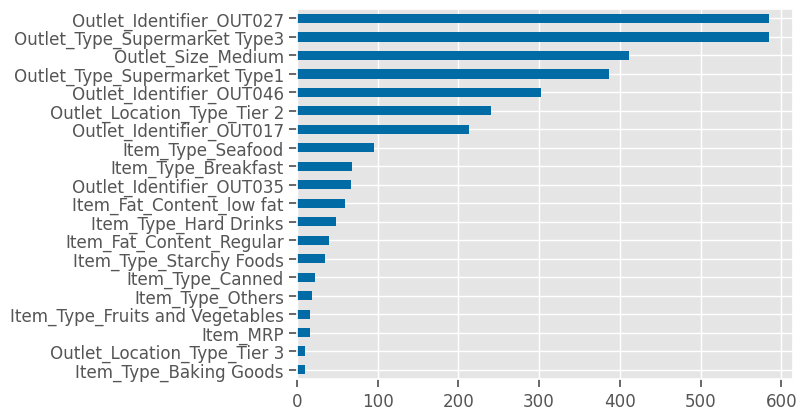

In [198]:
## Create a barplot of the coefficients
## sorted by values
## and drop the intercept
coef_series.drop('intercept').sort_values().tail(20).plot(kind='barh');

In [202]:
## Define a function to plot coefficients
def plot_coefficients(coefs, drop_intercept=True):
    if drop_intercept:
        coefs = coefs.drop('intercept')
    ax = coefs.sort_values().tail(20).plot(kind='barh', figsize=(5,5))
    ax.axvline(0, color='k')
    ax.set(xlabel='Item_Outet_Sales', title="Coefficients")
    plt.show();

In [203]:
## Display the coefficients series
## sorted by descending values
display(coef_series.sort_values(ascending=False))

intercept                         27,965.5792
Outlet_Identifier_OUT027             585.3186
Outlet_Type_Supermarket Type3        585.3186
Outlet_Size_Medium                   411.1039
Outlet_Type_Supermarket Type1        386.5085
Outlet_Identifier_OUT046             301.6516
Outlet_Location_Type_Tier 2          239.7502
Outlet_Identifier_OUT017             213.0552
Item_Type_Seafood                     95.0514
Item_Type_Breakfast                   68.4483
Outlet_Identifier_OUT035              66.8241
Item_Fat_Content_low fat              59.0520
Item_Type_Hard Drinks                 48.7152
Item_Fat_Content_Regular              40.1254
Item_Type_Starchy Foods               35.0694
Item_Type_Canned                      22.1663
Item_Type_Others                      18.9380
Item_Type_Fruits and Vegetables       16.5738
Item_MRP                              15.5975
Outlet_Location_Type_Tier 3           10.1675
Item_Type_Baking Goods                 9.4707
Item_Fat_Content_Low Fat          

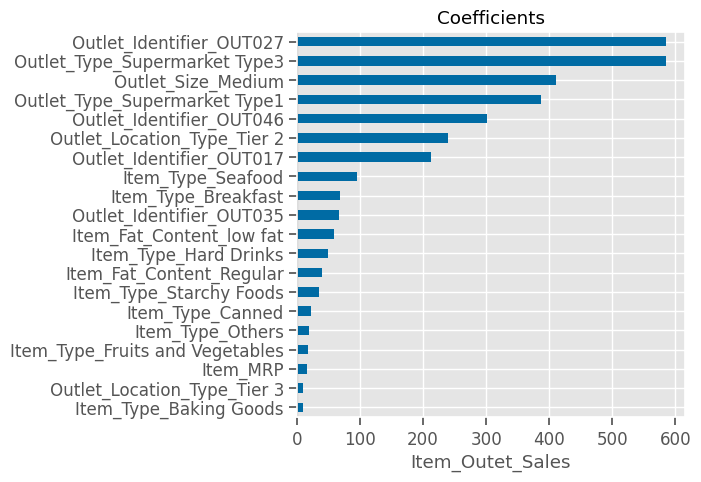

In [204]:
## Call the plot_coefficients function
plot_coefficients(coef_series)

### Summary
- The type of Supermarkey affects outlet sales by just under 600 annually.
- The location affects sales by over 200 annually.
- The types of foods available(seafood, breakfast items, low fat foods, vegetables and fruits) affects item sales from 25-100 annually.

### Random Forest Model

In [205]:
## Create an instance of the model
rf_reg = RandomForestRegressor()

## Fit the model
rf_reg.fit(X_train_proc, y_train)

RandomForestRegressor()

In [206]:
## Display the Model's metrics
evaluate_regression(rf_reg, X_train_proc, y_train,
                    X_test_proc, y_test)

Split,R^2,MAE,RMSE
Train,0.94,292.65,423.73
Test,0.56,818.28,"1,166.13"


### Feature Importances

In [207]:
# Extract Feature Importances
importances = rf_reg.feature_importances_
importances

array([5.21852009e-02, 9.51006649e-02, 4.41930281e-01, 2.62376949e-02,
       2.96781754e-03, 6.03746102e-03, 5.54464949e-03, 1.50945748e-03,
       1.55394309e-03, 4.39454438e-03, 2.71766534e-03, 2.48246000e-03,
       4.17709363e-03, 5.45779947e-03, 5.74238426e-03, 8.10419850e-03,
       2.86162779e-03, 4.14561451e-03, 6.27942827e-03, 3.51637467e-03,
       1.55571014e-03, 1.33005214e-03, 8.08744697e-03, 4.18743141e-03,
       2.92911442e-03, 1.22007181e-05, 1.37885807e-03, 3.06974152e-03,
       1.12074618e-03, 9.72505821e-06, 3.22548691e-02, 3.85022352e-03,
       4.96850507e-03, 3.11052147e-03, 3.15001977e-03, 1.52953301e-03,
       3.08181167e-03, 2.94363009e-03, 3.98092726e-03, 3.10980479e-03,
       2.57733524e-03, 2.46101883e-03, 1.96758190e-01, 1.80312089e-03,
       9.29212432e-04, 2.68638892e-02])

In [208]:
## Define a function to extract importances from a model
def get_feature_importances(model):
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    return pd.Series(importances, index=feature_names)

In [209]:
## Define a series variable by
## calling the get_feature_importances function
## to obtain importances from a model
importances =  get_feature_importances(rf_reg)
importances

Item_Weight                       0.0522
Item_Visibility                   0.0951
Item_MRP                          0.4419
Outlet_Establishment_Year         0.0262
Item_Fat_Content_LF               0.0030
Item_Fat_Content_Low Fat          0.0060
Item_Fat_Content_Regular          0.0055
Item_Fat_Content_low fat          0.0015
Item_Fat_Content_reg              0.0016
Item_Type_Baking Goods            0.0044
Item_Type_Breads                  0.0027
Item_Type_Breakfast               0.0025
Item_Type_Canned                  0.0042
Item_Type_Dairy                   0.0055
Item_Type_Frozen Foods            0.0057
Item_Type_Fruits and Vegetables   0.0081
Item_Type_Hard Drinks             0.0029
Item_Type_Health and Hygiene      0.0041
Item_Type_Household               0.0063
Item_Type_Meat                    0.0035
Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0013
Item_Type_Snack Foods             0.0081
Item_Type_Soft Drinks             0.0042
Item_Type_Starch

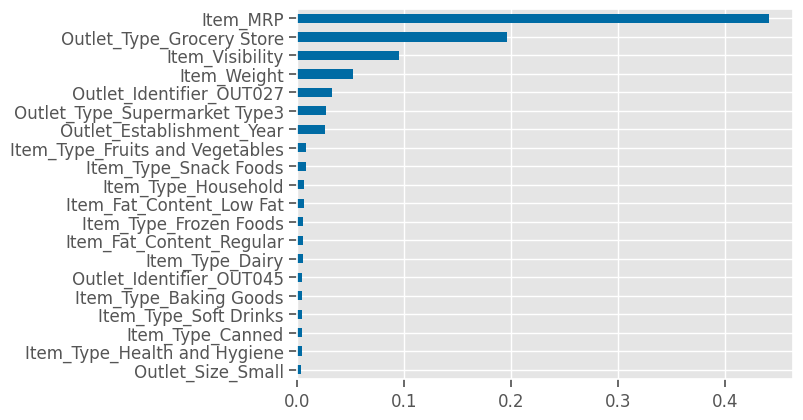

In [211]:
## Create a barplot of the importance series variable
## sorted by values
importances.sort_values().tail(20).plot(kind='barh');

### Summary
- The top 5 most important feature are: MRP, Type of Grocery Store, Item Visibility, Item Weight and Outlet Identifier.
- These features contribute the most positively to the increase of Item_Outlet_Sales.